# Задание 12-14. Классификация
## Общий порядок выполнения задач:
Вот общий порядок выполнения задач классификации:
1. Понимание проблемы и данных. Посмотрите на ваши данные, понимайте смысл каждого признака и формулируйте цель классификации.
2. Предварительная обработка данных. Это может включать масштабирование признаков, обработку пропущенных значений, преобразование категориальных переменных, а также обработку несбалансированных данных.
3. Разделение данных на обучающую и тестовую выборку. Это помогает оценить, как модель будет работать на новых данных.
4. Выбор и обучение классификаторов. Выберите некоторые модели, которые вы хотите обучить, он могут включать в себя логистическую регрессию, SVM, случайный лес, градиентный бустинг, наивный байесовский классификатор, k-NN, ансамблиевые методы и так далее.
5. Сравнение производительности моделей. Это может включать использование различных метрик, таких как точность, полнота, AUC-ROC. Вы также можете использовать матрицу ошибок для более подробного анализа результатов.
6. Подбор гиперпараметров. Используйте GridSearchCV или RandomizedSearchCV для оптимизации гиперпараметров ваших моделей.
7. Визуализация результатов. Визуализация может помочь вам понять, как ваша модель справляется с данными. Вы можете визуализировать важность признаков, ROC-кривые или любой другой интересующий вас аспект данных или моделей.
8. Интерпретация результатов. Основываясь на ваших результатах, вы можете интерпретировать, как ваша модель справляется с данными и какие признаки наиболее важны для классификации.
9. Оптимизация модели. На основе ваших выводов, вы можете внести улучшения в модели или процесс предварительной обработки данных и повторить процесс обучения, чтобы увидеть, приведет ли это к улучшению производительности.

### Задание 1.Классификация изображений рукописных цифр
Набор данных: [MNIST](http://yann.lecun.com/exdb/mnist/)

LogReg: Accuracy = 0.8729
LogReg: Confusion Matrix:
[[126   0   2   0   0   2   3   0   0   0]
 [  0 161   0   0   0   2   0   1   1   1]
 [  2   4 112   7   3   1   4   3   4   0]
 [  0   2   6 116   1   8   0   4   6   3]
 [  0   1   4   0  94   1   1   2   0   5]
 [  4   0   2  11   3 102   2   0   6   2]
 [  0   1   2   1   3   1 149   0   1   0]
 [  0   0   2   2   0   0   0 132   0   4]
 [  2   3   1   7   1  10   1   0 114   3]
 [  1   1   0   0   9   0   0   7   1 116]]

SVM: Accuracy = 0.9229
SVM: Confusion Matrix:
[[129   0   0   0   0   0   3   0   0   1]
 [  0 164   1   0   0   0   0   1   0   0]
 [  0   0 130   3   0   0   3   2   2   0]
 [  0   0   4 131   0   4   1   3   2   1]
 [  0   1   5   0  93   0   0   2   0   7]
 [  1   0   3   5   1 118   0   1   2   1]
 [  0   0   7   0   1   2 147   0   1   0]
 [  0   0   5   0   0   0   0 130   1   4]
 [  0   2   2   4   1   5   1   0 127   0]
 [  0   0   2   0   5   0   0   4   1 123]]

RandomForest: Accuracy = 0.9386
Random

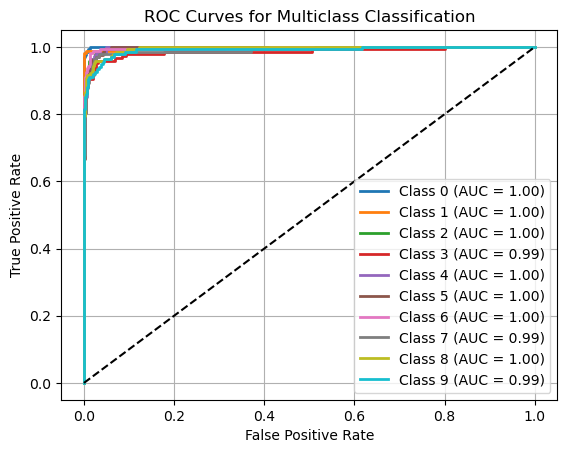

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  20.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  20.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  20.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  20.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  23.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  11.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.0s
[CV] END .....................C=0.1, gamma=1, k

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

# Загрузка данных и предварительная обработка
mnist_data = fetch_openml('mnist_784', version=1, as_frame=False)
features, labels = mnist_data["data"], mnist_data["target"].astype(int)
df_mnist = pd.DataFrame(features)
df_mnist['Label'] = labels
df_sample = df_mnist.sample(frac=0.1, random_state=42)
X_sample, y_sample = df_sample.drop('Label', axis=1), df_sample['Label']

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sample, test_size=0.2, random_state=42)

# Инициализация и обучение моделей
models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "NeuralNet": MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, solver='sgd', random_state=42, learning_rate_init=0.1)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

# Оценка точности и матриц ошибок
for name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(f"{name}: Confusion Matrix:\n{cm}\n")

# Построение ROC-кривых
y_bin_test = label_binarize(y_test, classes=np.unique(y_test))
num_classes = y_bin_test.shape[1]
one_vs_rest = OneVsRestClassifier(SVC(probability=True))
y_scores = one_vs_rest.fit(X_train, y_train).predict_proba(X_test)

plt.figure()
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_bin_test[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiclass Classification")
plt.legend()
plt.grid(True)
plt.show()

# Подбор параметров
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, verbose=2)
grid_search.fit(X_train, y_train)
print("Best GridSearch Params:", grid_search.best_params_)

random_search = RandomizedSearchCV(SVC(), param_distributions={
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'poly', 'sigmoid']
}, n_iter=50, random_state=42, verbose=2)
random_search.fit(X_train, y_train)
print("Best RandomSearch Params:", random_search.best_params_)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (29,) and arg 1 with shape (784,).

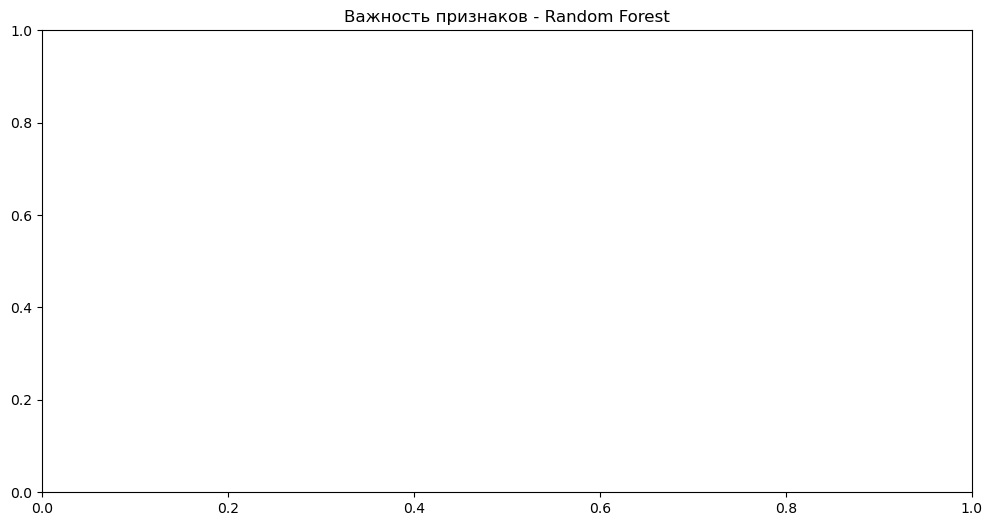

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Проверяем, что RandomForest был обучен
if "RandomForest" in models:
    rf_clf = models["RandomForest"]
    if hasattr(rf_clf, "feature_importances_"):
        # Важность признаков
        feature_importances = rf_clf.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]  # Индексы отсортированных признаков

        # Построение графика важности признаков
        plt.figure(figsize=(12, 6))
        plt.title("Важность признаков - Random Forest")
        plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], 
                align="center", width=0.8, edgecolor='none', color='skyblue')
        plt.xlabel("Индекс признака")
        plt.ylabel("Важность признака")
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print("Модель RandomForestClassifier не предоставляет атрибут feature_importances_.")
else:
    print("Модель RandomForestClassifier не была обучена.")


### Задача 2. Определение мошенничества с кредитными картами
Набор данных: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [5]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Загрузка данных и предварительная обработка
credit_data = pd.read_csv("data/creditcard.csv")
credit_sample = credit_data.sample(frac=0.02, random_state=42)

# Масштабирование признака "Amount"
scaler = StandardScaler()
credit_sample['Amount'] = scaler.fit_transform(credit_sample[['Amount']])

# Разделение признаков и целевой переменной
X_credit = credit_sample.drop(['Time', 'Class'], axis=1)
y_credit = credit_sample['Class']

# Балансировка классов с помощью SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_credit, y_credit)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Обучение моделей
models_credit = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "NeuralNet": MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
}

for name, model in models_credit.items():
    model.fit(X_train, y_train)

# Оценка моделей
for name, model in models_credit.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}, Recall = {recall:.4f}, Precision = {precision:.4f}")


LogReg: Accuracy = 0.9996, Recall = 1.0000, Precision = 0.9991
SVM: Accuracy = 0.9991, Recall = 1.0000, Precision = 0.9982
RandomForest: Accuracy = 1.0000, Recall = 1.0000, Precision = 1.0000
GradientBoosting: Accuracy = 1.0000, Recall = 1.0000, Precision = 1.0000
NeuralNet: Accuracy = 1.0000, Recall = 1.0000, Precision = 1.0000
